## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [65]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [66]:
df = pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset:

In [67]:
df.shape

(294478, 5)

*There are 294,478 rows in the A/B user dataset.*

c. The number of unique users in the dataset.

In [68]:
df['user_id'].nunique()

290584

*There are 290,584 unique users in the A/B user dataset.*

d. The proportion of users converted.

In [69]:
# as there are duplicate user_ids and some may have converted on the new landing page but not on the old, 
# the dataframe has to be first grouped by user_id and then the converted column is summed
dfa = df.groupby('user_id')['converted'].sum().reset_index()
dfa.head()

,user_id,converted
0,630000,0
1,630001,1
2,630002,0
3,630003,0
4,630004,0


In [70]:
# number of users converted
a = dfa.converted.sum()
a

35237

In [71]:
# number of unique users
b = df.user_id.nunique()
b

290584

In [72]:
# calculation of percentage of users converted
a/b*100

12.126269856564711

*12% of users converted*

e. The number of times the `new_page` and `treatment` don't line up.

In [73]:
# Use crosstab to create a frequency table of the factors landing_page and group
dfb = pd.crosstab(df.landing_page,df.group)
dfb

group,control,treatment
landing_page,,
new_page,1928,145311
old_page,145274,1965


In [74]:
# sum the frequency of new_page and control occurance with old_page and treatment occurance
dfb.at['new_page','control']+dfb.at['old_page','treatment']

3893

*On 3,893 occasions in the A/B dataset the new_page and treatment do not line up.*

f. Do any of the rows have missing values?

In [75]:
df.isnull().values.ravel().sum()

0

*There are no rows which have missing values in the A/B dataset.*

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [76]:
# create temporary dataframe where group = 'treatment' and landing_page = 'new_page'
df2a = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

# create temporary dataframe where group = 'control' and landing_page = 'old_page'
df2b = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]

# join two temporary dataframes
df2 = df2a.append(df2b, ignore_index = True)

df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [77]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [78]:
df2['user_id'].nunique()

290584

*There are 290,584 unique users in the clean A/B user dataset.*

b. There is one **user_id** repeated in **df2**.  What is it?

In [79]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


*User ID number 773192 is repeated in the clean A/B user dataset.*

c. What is the row information for the repeat **user_id**? 

In [80]:
df2[(df2['user_id'] == 773192)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [81]:
df2 = df2.drop_duplicates(subset=['user_id'], keep=False)
df2.shape

(290583, 5)

*The number of rows is one less than the inital df2 proving one row has been removed.*

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [82]:
df2.converted.mean()

0.11959749882133504

b. Given that an individual was in the `control` group, what is the probability they converted?

In [83]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [84]:
df2.query('group == "treatment"')['converted'].mean()

0.11880888313869065

d. What is the probability that an individual received the new page?

In [85]:
len(df2[(df2['landing_page'] == 'new_page')]) / len(df2.index)

0.5000602237570677

*The probability of landing on the new page 0.5001.*

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

*Given the small difference of 0.0015 in probabilites between those in the Control group converting and those in the Treatment group converting, there is not sufficient evidence to say the new treatment page leads to more conversions.*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} ≤ 0$$

$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [86]:
pnew = df2.converted.mean()
pnew

0.11959749882133504

*The convert rate for $p_{new}$ under the null is the same as the probability of an individual converting regardless of the page they receive, which is 0.1196.*

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [87]:
pold = df2.converted.mean()
pold

0.11959749882133504

*The convert rate for $p_{old}$ under the null is the same as the probability of an individual converting regardless of the page they receive, which is 0.1196.*

c. What is $n_{new}$?

In [88]:
nnew = df2.query('landing_page == "new_page"').shape[0]
nnew

145309

*The number of cases where landing_page is equal to new_page ($n_{new}$) is 145309.*

d. What is $n_{old}$?

In [89]:
nold = df2.query('landing_page == "old_page"').shape[0]
nold

145274

*The number of cases where landing_page is equal to new_page ($n_{old}$) is 145274.*

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [90]:
# np.random.choice(a=, size=output shape, p=probabilities associated with each entry in a)
# a=2, size=number of trials to run, p=probabiity of trial
new_page_converted = np.random.choice(2, size = nnew, p=[1-pnew, pnew])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [91]:
old_page_converted = np.random.choice(2, size = nold, p=[1-pold, pold])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [92]:
new_page_converted.mean() - old_page_converted.mean()

-6.985720365085268e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [93]:
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice(2, size = nnew, p=[1-pnew, pnew])
    old_page_converted = np.random.choice(2, size = nold, p=[1-pold, pold])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

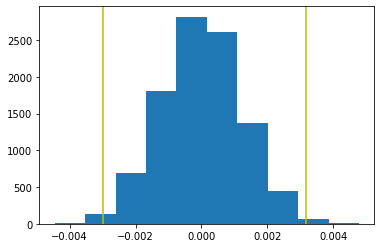

In [94]:
# calcaulate 99% confidence interval in p_diffs
lower, upper = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)

# plot p_diffs with 99% confidence interval
plt.hist(p_diffs);
plt.axvline(lower, color='y');
plt.axvline(upper, color='y');

*This is expected. Central Limit Theorum states that with a large enough sample size, the same mean follows a normal distribution as illustrated above. Furthermore, the 99% confidence markers plotted on the normal distribution demonstrate most values fall within this region suggesting the null hypothesized value did generate the statistic.*

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [95]:
a_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
a_diff

-0.0015774213617705535

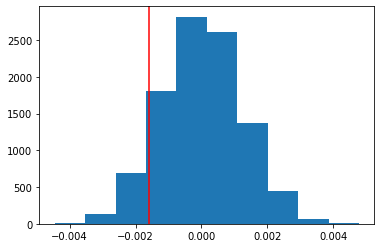

In [96]:
plt.hist(p_diffs)
plt.axvline(a_diff, color='r')

In [97]:
# p-value
(p_diffs > a_diff).mean()

0.9014

*The actual observed difference is -0.001 and the proportion of p_diffs greater than the observed difference is 0.904.*

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

*The p-value in this study is 0.904.*

*In the majority of analyses, an alpha (type I error threshold) of 0.05 is used as the cutoff for significance. If the p-value less than or equal to 0.05, there is strong evidence to reject the null. If the p-value is greater than 0.05, there is strong evidence to fail to reject the null.*

*In this analysis, the p-value is much larger than 0.05.*

*There is therefore evidence that our statistic likely came from the null hypothesis and therefore **fail to reject the null hypothesis**.*

*There is therefore no conclusive difference between the old and new pages regarding conversion rate.*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [98]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [99]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3102408579271012, 0.9049428161159749)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

*In the above case, the z-score and p-value suggest that the conversion rates for the old and new pages are not statistically different from one another. This therefore indicates __failure to reject the null hypothesis__.*

*This conclusion is not different to earlier steps of the analysis again stating there is no conclusive difference between the old and new pages regarding conversion rate.*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

*As the conversion rate is binary (1 or 0), a **logistic regression model** is most suitable.*

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [100]:
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('drop', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [103]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [104]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            1
Date:                Sat, 04 Apr 2020   Pseudo R-squ.:               8.068e-06
Time:                        15:01:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1901
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.310      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

*The p-value associated with ab_page is 0.190.*

*The p-values differ between the linear regression model (0.190) compared to the earlier A/B test (0.904) because the null hypothesis has changed. In the earlier test, the null hypothesis was that the old page was equally __or more__ effective at converting users than the new page i.e. a one-tailed test. However, in the linear regression model the focus is on the difference in conversion rates and therefore the null hypothesis is that the old page has the same effectiveness at converting users as the new page i.e. a two-tailed test.*

*As the p-value in the linear regression model above is greater than the type I error threshold (α = 0.05), there is evidence to __fail to reject the null hypothesis__.*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Including other factors into the regression model is generally a good idea. It can be assumed from the above tests that there is no difference in conversion rates between the new and old pages. However, nothing is currently known about the demographic or nationality of the individuals tested and therefore it cannot be deduced as to whether the null result was actually due to all users being of the same demographic and/or nationality.

Adding more factors may bring disadvantages to the A/B test however including: 
- Non-linearity of the response-predictor relationships
- Correlation of error terms
- Non-constant Variance and Normally Distributed Errors
- Outliers/ High leverage points
- Multicollinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [105]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [106]:
# unique country values
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [107]:
### Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('UK', axis = 1)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,CA
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [108]:
df_new['intercept'] = 1
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 Apr 2020   Pseudo R-squ.:               1.520e-05
Time:                        15:01:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0507      0.028      1.786      0.074      -0.005       0.106
CA             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [109]:
np.exp(results.params)

intercept    0.130350
US           1.052027
CA           1.041653
dtype: float64

*Compared to the UK, the US (1.05 times) and Canada (1.04 times) based users are ever so slightly more likely to convert. However, it is statistically insignificant and with the p-values being greater than the 0.05 type I error threshold, there is evidence to __fail to reject the null hypothesis__ as in previous tests.*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [113]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Sat, 04 Apr 2020   Pseudo R-squ.:               2.322e-05
Time:                        15:02:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1761
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.306      0.191      -0.037       0.007
US             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.129      -0.012       0.093
==============================================================================
"""

In [111]:
np.exp(results.params)

intercept    0.131331
ab_page      0.985175
US           1.051944
CA           1.041605
dtype: float64

In [112]:
1/np.exp(results.params)

intercept    7.614333
ab_page      1.015048
US           0.950621
CA           0.960057
dtype: float64

*Including type of page and country of origin to understand conversion rates does not provide a p-value less than the 0.05 type I error threshold. There is therefore evidence to __fail to reject the null hypothesis__ as in previous tests. There is also very little difference between conversion rates of those parameters.*

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.